<a href="https://colab.research.google.com/github/darshil0805/models-from-scratch/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Logistic Regression from Scratch
Using pytorch to implement logisitc regression from scratch

In [1]:
# imports
import torch
import torchvision 
from torchvision.datasets import MNIST

In [2]:
mnist_train = MNIST(train = True, root = 'data/',transform = torchvision.transforms.ToTensor(),download = True)
mnist_test = MNIST(train = False, root= 'data/',transform = torchvision.transforms.ToTensor(), download = True)

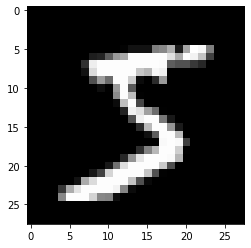

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.imshow(np.array(mnist_train[0][0][0]),cmap = 'gray')

In [4]:
from torch.utils.data import random_split

train_ds,valid_ds = random_split(mnist_train,[50000,10000])

In [5]:
from torch.utils.data import DataLoader
bs = 128
train_dl = DataLoader(train_ds,bs,shuffle = True)
valid_dl = DataLoader(valid_ds,bs,shuffle = True)

In [6]:
import torch.nn.functional as F
import torch.nn as nn

In [7]:
model = nn.Linear(28*28,10)

In [8]:
x = list(train_dl)[0][0]

In [9]:
x = x.reshape(-1,784)

In [10]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [11]:
input_size = 28*28
num_classes = 10
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)
  
  def forward(self,xb):
    xb = xb.reshape(-1,784)
    return self.linear(xb)

  def training_step(self,batch):
    xb,yb = batch
    preds = self(xb)
    loss = F.cross_entropy(preds,yb)
    return loss

  def validation_step(self,batch):
    xb,yb = batch
    preds = self(xb)
    loss = F.cross_entropy(preds,yb)
    acc = accuracy(preds,yb)
    return {'val_acc':acc,'val_loss':loss}
  
  def validation_epoch_end(self,outputs): # outputs is the list of dictionaries of validation_step of every batch
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'epoch_acc':epoch_acc.item(),'epoch_loss':epoch_loss.item()}

  def epoch_end(self,epoch,result):
    print(f"Epoch : {epoch} has Accuracy : {result['epoch_acc']:.4f} and Loss : {result['epoch_loss']:.4f}")
    



In [12]:
def evaluate(model,val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [13]:
model = MnistModel()

In [14]:
evaluate(model,valid_dl)

{'epoch_acc': 0.06309335678815842, 'epoch_loss': 2.323092222213745}

In [15]:
def fit(epochs,model,train_dl,valid_dl,lr,opt = torch.optim.SGD):
  optimizer = opt(model.parameters(),lr = lr)
  history = []
  for i in range(epochs):
    # Training
    for batch in train_dl:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation
    result = evaluate(model,valid_dl)
    model.epoch_end(i+1,result)
    history.append(result)
  
  return history

In [16]:
history1 = fit(20,model,train_dl,valid_dl,1e-3)

Epoch : 1 has Accuracy : 0.6022 and Loss : 1.9452
Epoch : 2 has Accuracy : 0.7106 and Loss : 1.6806
Epoch : 3 has Accuracy : 0.7573 and Loss : 1.4787
Epoch : 4 has Accuracy : 0.7788 and Loss : 1.3303
Epoch : 5 has Accuracy : 0.7966 and Loss : 1.2130
Epoch : 6 has Accuracy : 0.8048 and Loss : 1.1243
Epoch : 7 has Accuracy : 0.8150 and Loss : 1.0493
Epoch : 8 has Accuracy : 0.8216 and Loss : 0.9858
Epoch : 9 has Accuracy : 0.8270 and Loss : 0.9366
Epoch : 10 has Accuracy : 0.8301 and Loss : 0.8965
Epoch : 11 has Accuracy : 0.8341 and Loss : 0.8614
Epoch : 12 has Accuracy : 0.8380 and Loss : 0.8281
Epoch : 13 has Accuracy : 0.8419 and Loss : 0.8001
Epoch : 14 has Accuracy : 0.8458 and Loss : 0.7726
Epoch : 15 has Accuracy : 0.8491 and Loss : 0.7505
Epoch : 16 has Accuracy : 0.8521 and Loss : 0.7327
Epoch : 17 has Accuracy : 0.8527 and Loss : 0.7149
Epoch : 18 has Accuracy : 0.8540 and Loss : 0.7001
Epoch : 19 has Accuracy : 0.8574 and Loss : 0.6827
Epoch : 20 has Accuracy : 0.8569 and Los

In [17]:
history2 = fit(20,model,train_dl,valid_dl,1e-5)

Epoch : 1 has Accuracy : 0.8569 and Loss : 0.6733
Epoch : 2 has Accuracy : 0.8569 and Loss : 0.6733
Epoch : 3 has Accuracy : 0.8576 and Loss : 0.6693
Epoch : 4 has Accuracy : 0.8569 and Loss : 0.6727
Epoch : 5 has Accuracy : 0.8583 and Loss : 0.6692
Epoch : 6 has Accuracy : 0.8555 and Loss : 0.6747
Epoch : 7 has Accuracy : 0.8576 and Loss : 0.6710
Epoch : 8 has Accuracy : 0.8590 and Loss : 0.6682
Epoch : 9 has Accuracy : 0.8576 and Loss : 0.6713
Epoch : 10 has Accuracy : 0.8571 and Loss : 0.6708
Epoch : 11 has Accuracy : 0.8585 and Loss : 0.6680
Epoch : 12 has Accuracy : 0.8578 and Loss : 0.6700
Epoch : 13 has Accuracy : 0.8585 and Loss : 0.6680
Epoch : 14 has Accuracy : 0.8578 and Loss : 0.6694
Epoch : 15 has Accuracy : 0.8571 and Loss : 0.6685
Epoch : 16 has Accuracy : 0.8564 and Loss : 0.6721
Epoch : 17 has Accuracy : 0.8585 and Loss : 0.6671
Epoch : 18 has Accuracy : 0.8578 and Loss : 0.6711
Epoch : 19 has Accuracy : 0.8585 and Loss : 0.6664
Epoch : 20 has Accuracy : 0.8571 and Los

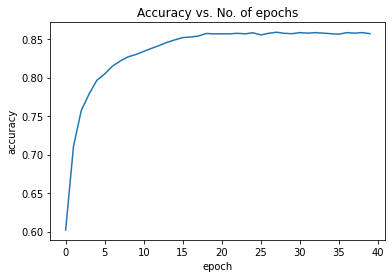

In [18]:
history = history1 + history2
accuracies = [result['epoch_acc'] for result in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

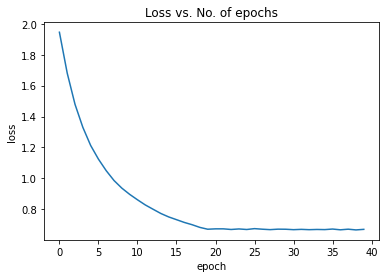

In [19]:
losses = [result['epoch_loss'] for result in history]
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [20]:
def predict_image(img,model):
  out = model(img)
  _,preds = torch.max(out,dim = 1)
  return preds.item()

Prediction : 0, Label : 0


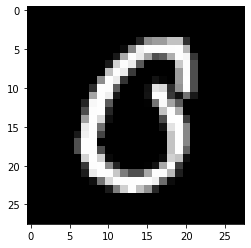

In [21]:
img,label = valid_ds[0]
print(f'Prediction : {predict_image(img,model)}, Label : {label}')
plt.imshow(img[0],cmap = 'gray');

Prediction : 1, Label : 1


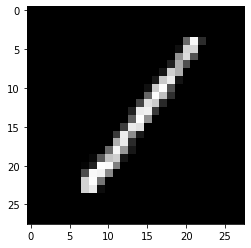

In [22]:
img,label = valid_ds[45]
print(f'Prediction : {predict_image(img,model)}, Label : {label}')
plt.imshow(img[0],cmap = 'gray');

Prediction : 8, Label : 8


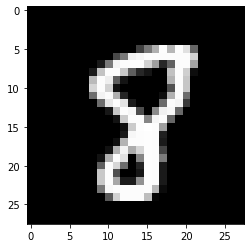

In [23]:
img,label = valid_ds[23]
print(f'Prediction : {predict_image(img,model)}, Label : {label}')
plt.imshow(img[0],cmap = 'gray');

In [24]:
result = evaluate(model,valid_dl)

In [25]:
result

{'epoch_acc': 0.8571004867553711, 'epoch_loss': 0.6702978610992432}